# Importing Libraries

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [26]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 60 files belonging to 3 classes.


['Healthy', 'Powdery', 'Rust']


# Loading Model

In [27]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

#Visualising and Performing Prediction on Single image

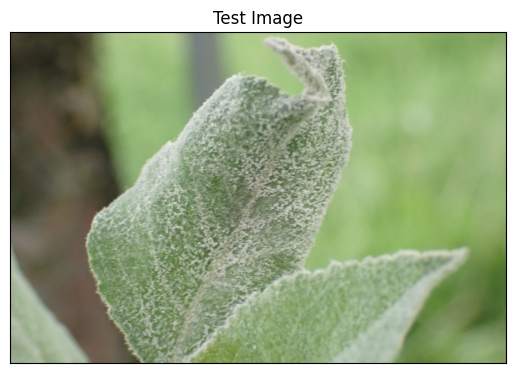

In [28]:
#Test Image Visualization
import cv2
image_path = 'uploads/8781dcd12a57aec5.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [29]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(f"Image array shape: {input_arr.shape}")  # Check shape
print(f"Image array type: {input_arr.dtype}")   # Check type
predictions = cnn.predict(input_arr)

Image array shape: (1, 128, 128, 3)
Image array type: float32
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


In [30]:
print(predictions)

[[3.4617985e-04 9.9933225e-01 3.2148554e-04]]


In [31]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

1


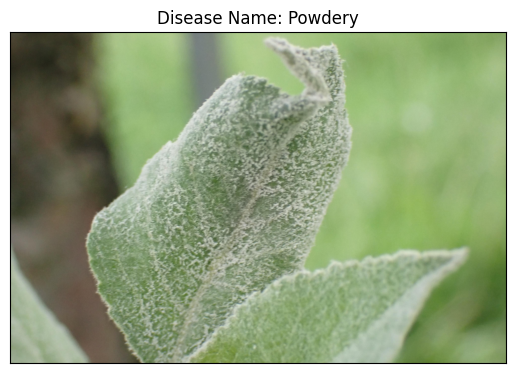

In [32]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()